# Bank Loan Status (Part II)

Since the Loan Status column is missing from test dataset, I will predict it to complete and concatenate both datasets

In [2]:
# Importing Initial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Using this to ignore those red text blobs of warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
# To view all the features (Columns)
pd.set_option('display.max_columns', None)

In [5]:
# Reading in both encoded train and test dataset
train = pd.read_csv('credit_train_clean.csv')
test = pd.read_csv('credit_test_clean.csv')

In [6]:
train.head()

,Unnamed: 0,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,722.0,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,722.0,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
train.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,722.0,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,722.0,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [26]:
target.unique == 0

False

In [10]:
# Converting the features containg strings to binary before splitting and fitting in our pipeline.

encoded_train = train.copy()

encode_list = ['Term', 'Purpose', 'Home Ownership', 'Years in current job']

encoded_columns = pd.get_dummies(encoded_train[encode_list])
encoded_train.drop(encode_list, axis = 1, inplace = True)

encoded_train = encoded_train.merge(encoded_columns, left_index = True, right_index = True)
encoded_train

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,721.0,8.069490e+05,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,722.0,1.378277e+06,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99789,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,725.0,4.754370e+05,2202.86,22.3,33.0,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
99790,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,732.0,1.289416e+06,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
99791,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,742.0,1.150545e+06,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99792,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,746.0,1.717524e+06,9890.07,15.0,34.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
# we don't need the Loan & Custome IDs
encoded_train.drop(columns=['Loan ID','Customer ID'], inplace=True)

In [12]:
encoded_train.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,Fully Paid,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Fully Paid,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Fully Paid,347666.0,721.0,8.069490e+05,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,Fully Paid,176220.0,722.0,1.378277e+06,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
# Separate out the features and targets
features = encoded_train.drop(columns='Loan Status')
target = encoded_train['Loan Status']

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate & Fit
RF_model = RandomForestClassifier(n_estimators=100, max_depth=30, n_jobs=-1).fit(X_train,y_train)

# Score on training data 
print("Random Forrest Classifier Train score: %3.3f" % (100* RF_model.score(X_train,y_train)))

# Score on testing data
print("Random Forrest Classifier Test score: %3.3f" % (100* RF_model.score(X_test,y_test)))

Random Forrest Classifier Train score: 99.454
Random Forrest Classifier Test score: 81.667


In [16]:
# fitting Random Forrest Classification with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
RF_model = RandomForestClassifier()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(RF_model, X_train, y_train, cv = 5)
print(abs(scores))

[0.79872244 0.79820881 0.79902298 0.79463894 0.79857197]


In [17]:
test.drop(columns=['Unnamed: 0','Loan ID','Customer ID'], inplace=True)

In [18]:
test.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,42.0,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,42.0,11.0,0.0,679573.0,904442.0,0.0,0.0
2,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [19]:
encoded_test = test.copy()

encode_list = ['Term', 'Purpose', 'Home Ownership', 'Years in current job']

encoded_columns = pd.get_dummies(encoded_test[encode_list])
encoded_test.drop(encode_list, axis = 1, inplace = True)

encoded_test = encoded_test.merge(encoded_columns, left_index = True, right_index = True)
encoded_test

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,611314.0,7.470000e+02,2.074116e+06,42000.83,21.8,42.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,266662.0,7.340000e+02,1.919190e+06,36624.40,19.4,42.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,153494.0,7.090000e+02,8.711120e+05,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,176242.0,7.270000e+02,7.800830e+05,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,321992.0,7.440000e+02,1.761148e+06,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,157806.0,7.310000e+02,1.514376e+06,4795.41,12.5,42.0,9.0,0.0,87058.0,234410.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9974,132550.0,7.180000e+02,7.631920e+05,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9975,223212.0,1.369940e+06,1.369940e+06,4354.42,27.2,41.0,8.0,1.0,99636.0,568370.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
9976,99999999.0,7.210000e+02,9.720970e+05,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
y_pred = RF_model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix & Classification Report")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix & Classification Report
[[ 1036  3507]
 [  152 15264]]
              precision    recall  f1-score   support

           0       0.87      0.23      0.36      4543
           1       0.81      0.99      0.89     15416

    accuracy                           0.82     19959
   macro avg       0.84      0.61      0.63     19959
weighted avg       0.83      0.82      0.77     19959



In [24]:
gen_pred_loan_status = RF_model.predict(encoded_test)

In [25]:
encoded_test['Loan Status'] = gen_pred_loan_status

In [26]:
encoded_test.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Loan Status
0,611314.0,747.0,2074116.0,42000.83,21.8,42.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,266662.0,734.0,1919190.0,36624.40,19.4,42.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,153494.0,709.0,871112.0,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,176242.0,727.0,780083.0,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,321992.0,744.0,1761148.0,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [27]:
encoded_train.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,Fully Paid,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Fully Paid,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Fully Paid,347666.0,721.0,8.069490e+05,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,Fully Paid,176220.0,722.0,1.378277e+06,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [28]:
labelencoder_loan_status = LabelEncoder()
loan_status = labelencoder_loan_status.fit_transform(encoded_train['Loan Status'])

In [29]:
encoded_train['Loan Status'] = loan_status

In [30]:
encoded_train.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,1,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,347666.0,721.0,8.069490e+05,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,176220.0,722.0,1.378277e+06,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


I will re-arrange the columns to concatenate both datasets correctly

In [31]:
cols = list(encoded_test.columns.values)

In [32]:
cols = list(['Loan Status','Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History',
             'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
             'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens','Term_Long Term',
             'Term_Short Term','Purpose_Business Loan','Purpose_Buy House','Purpose_Buy a Car',
             'Purpose_Debt Consolidation','Purpose_Educational Expenses','Purpose_Home Improvements',
             'Purpose_Medical Bills','Purpose_Other','Purpose_Take a Trip','Purpose_major_purchase','Purpose_moving',
             'Purpose_other','Purpose_renewable_energy','Purpose_small_business','Purpose_vacation','Purpose_wedding',
             'Home Ownership_HaveMortgage','Home Ownership_Home Mortgage','Home Ownership_Own Home','Home Ownership_Rent',
             'Years in current job_1 year','Years in current job_10+ years','Years in current job_2 years',
             'Years in current job_3 years','Years in current job_4 years','Years in current job_5 years','Years in current job_6 years',
             'Years in current job_7 years','Years in current job_8 years','Years in current job_9 years',
             'Years in current job_< 1 year',])

In [33]:
encoded_test = encoded_test[cols]

In [34]:
encoded_test.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,1,611314.0,747.0,2074116.0,42000.83,21.8,42.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,266662.0,734.0,1919190.0,36624.40,19.4,42.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,153494.0,709.0,871112.0,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,176242.0,727.0,780083.0,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,1,321992.0,744.0,1761148.0,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [35]:
# Concatenating both encoded datasets
all_encoded = pd.concat([encoded_train,encoded_test], axis=0)

In [36]:
all_encoded.shape

(109772, 46)

### To Predict Bankruptcy

Now I have the full dataset, I will find the best model to predict bankruptcy and evaluate that model.

Initial I will scale and reduce dimentionality of my dataset.

In [37]:
all_encoded.head(2)

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,1,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
# Separate out the features and targets
features = all_encoded.drop(columns='Bankruptcies')
target = all_encoded['Bankruptcies']

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [39]:
# Reducing dimentionality on the scaled data
# Build and fit a PCA model to the data 
my_pca = PCA(n_components=23)
my_pca.fit(X_train)

#Transform the data
X_train_pca = my_pca.transform(X_train)
X_test_pca = my_pca.transform(X_test)

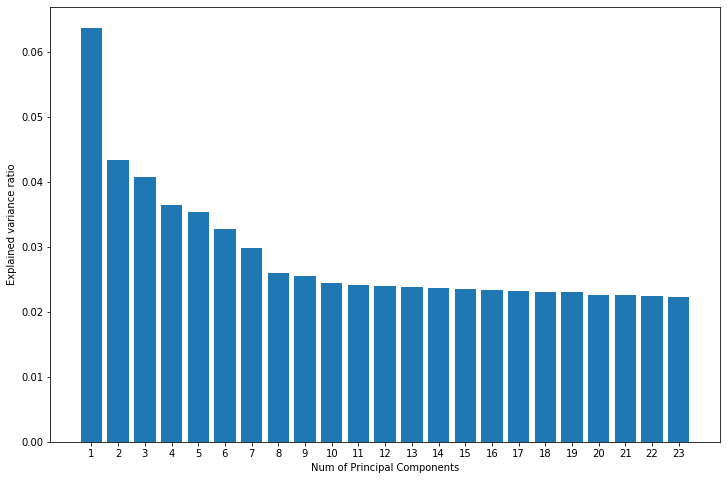

In [40]:
# Plot the explained variance ratio for each PC
plt.figure(figsize=(12,8))
plt.bar(np.arange(23)+1, my_pca.explained_variance_ratio_)
plt.xticks(np.arange(23)+1)
plt.ylabel('Explained variance ratio')
plt.xlabel('Num of Principal Components')
plt.show()

Most of the variance in my data can be explained by about 10 principal components

In [41]:
my_pca = PCA(n_components=10)
my_pca.fit(X_train)

#Transform the data
X_train_pca = my_pca.transform(X_train)
X_test_pca = my_pca.transform(X_test)

In the following models I will use the dimensionally reduced data for hyperparameter optimization in each model, while I will use the full data to score and predict in each model. Then I will find the best scoring model to finalize my prediction.

In [125]:
%%time
# Various values of K
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,100,10))
train_accuracies= []
test_accuracies = []

for k in k_values:
    my_knn = KNeighborsClassifier(n_neighbors=k)
    my_knn.fit(X_train_pca, y_train)
    
    train_accuracy = my_knn.score(X_train_pca,y_train)
    test_accuracy = my_knn.score(X_test_pca,y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

CPU times: user 12min 58s, sys: 3.05 s, total: 13min 1s
Wall time: 12min 52s


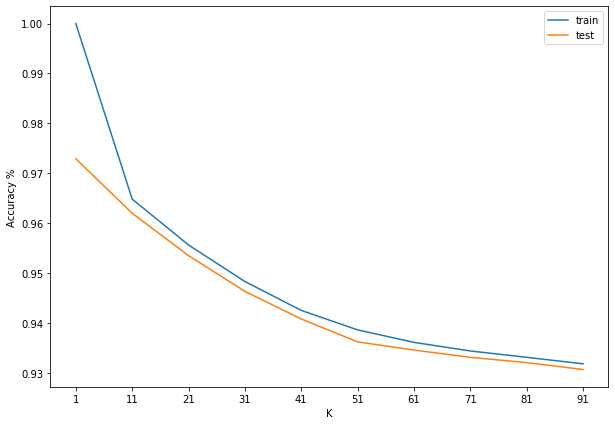

In [126]:
# where is it overfitting/underfitting?

plt.figure(figsize=(10,7))
plt.plot(k_values, train_accuracies, label='train')
plt.plot(k_values, test_accuracies, label='test')
plt.xlabel('K')
plt.xticks(range(1,100,10))
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

In [129]:
%%time
from sklearn.metrics import accuracy_score
# re-instantiate and fit our classifier (K=11) & predict
my_knn = KNeighborsClassifier(n_neighbors=11)
my_knn.fit(X_train,y_train)

model_prediction = my_knn.predict(X_test)
accuracy = accuracy_score(model_prediction, y_test)

print(f"Score on data model was fitted to: {accuracy*100}%")

# Score on training data 
print("KNN (K=11) Train score: %3.3f" % (100* my_knn.score(X_train,y_train)))

# Score on testing data
print("KNN (K=11) Test score: %3.3f" % (100* my_knn.score(X_test,y_test)))

Score on data model was fitted to: 95.9443209561637%
KNN (K=11) Train score: 96.433
KNN (K=11) Test score: 95.944
CPU times: user 18min 36s, sys: 1.21 s, total: 18min 37s
Wall time: 18min 37s


In [131]:
# fitting KNN Classification with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
KNN_model = KNeighborsClassifier()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(KNN_model, X_train, y_train, cv = 5)
print(abs(scores))

[0.96387371 0.96289774 0.96398421 0.96434429 0.96361538]


In [130]:
print("Confusion Matrix & Classification Report for the KNN Model")
print(confusion_matrix(y_test, model_prediction))
print()
print(classification_report(y_test, model_prediction))

Confusion Matrix & Classification Report for the KNN Model
[[24131   300     4     2     0]
 [  666  2185     4     0     0]
 [   10    89    13     0     0]
 [    4    13    11     1     1]
 [    2     2     2     3     0]]

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     24437
         1.0       0.84      0.77      0.80      2855
         2.0       0.38      0.12      0.18       112
         3.0       0.17      0.03      0.06        30
         4.0       0.00      0.00      0.00         9

    accuracy                           0.96     27443
   macro avg       0.47      0.38      0.40     27443
weighted avg       0.96      0.96      0.96     27443



In [134]:
%%time
# Various parameters for XGBoost Calssifier

from xgboost import XGBClassifier

n_estimators = [1,10,15,20,50,100]
learning_rate = [0.1, 0.3, 0.5, 0.8, 1, 2]
max_depth = [1,3,5,10,15,20]

test_scores = []
train_scores = []
paras_list = []

for n in n_estimators:
    for l in learning_rate:
        for m in max_depth:
            
            #fitting the Booster
            XGB_model = XGBClassifier(max_depth=m, learning_rate=l, n_estimators=n)
            XGB_model.fit(X_train_pca,y_train)   

            # score
            test_scores.append(XGB_model.score(X_test_pca, y_test))
            train_scores.append(XGB_model.score(X_train_pca,y_train))
            paras_list.append(str((n, l, m)))

CPU times: user 1h 58min 12s, sys: 13.5 s, total: 1h 58min 25s
Wall time: 8h 6min 18s


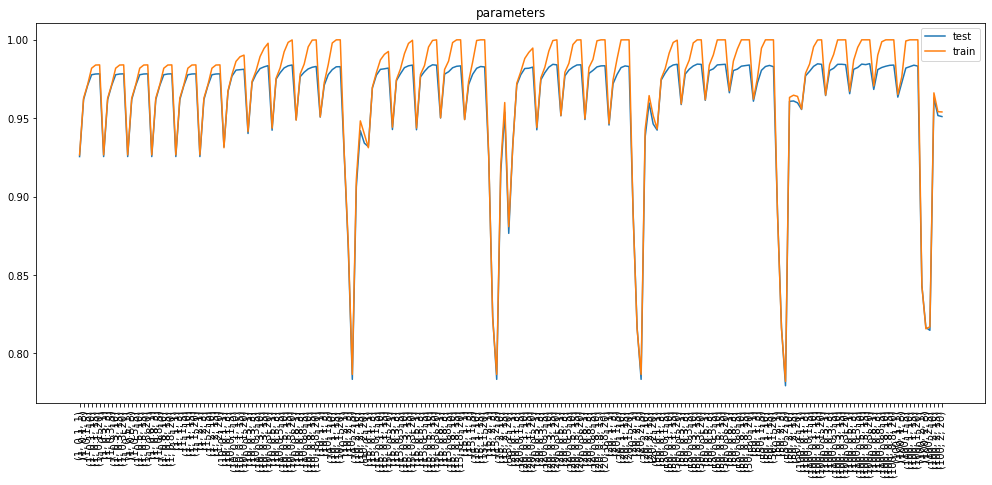

In [136]:
# where is it overfitting/underfitting?

plt.figure(figsize=(17, 7))
plt.plot(paras_list, test_scores, label = 'test')
plt.plot(paras_list, train_scores, label = 'train')
plt.title('parameters')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

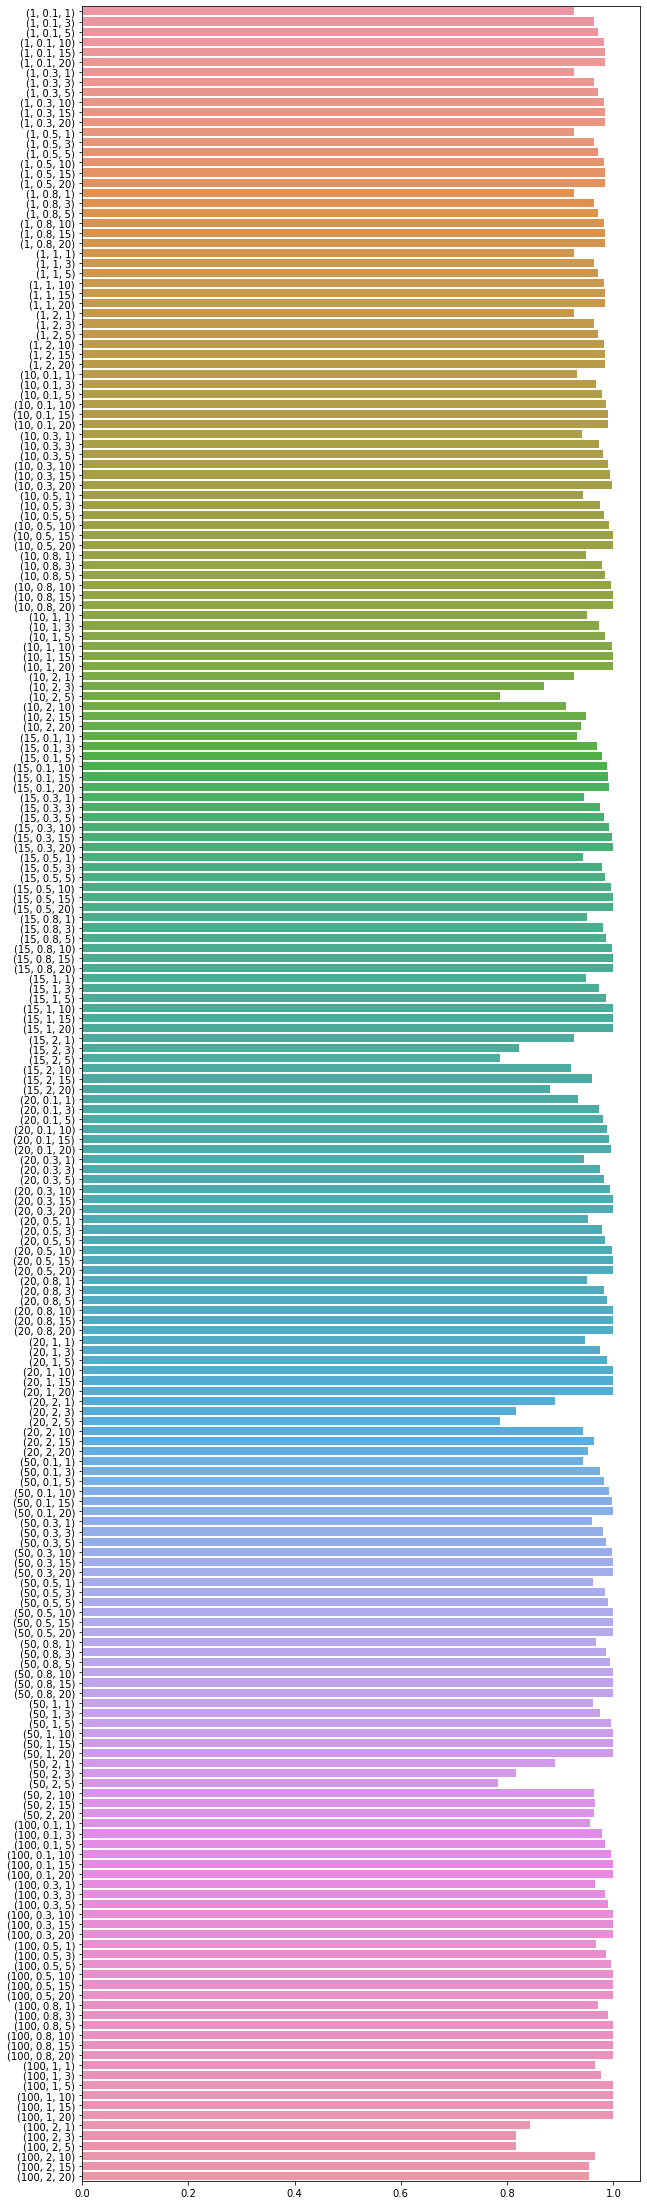

In [142]:
# where is it overfitting/underfitting?

plt.figure(figsize=(10, 40))
sns.barplot(test_scores, paras_list, label = 'test')
sns.barplot(train_scores, paras_list, label = 'train')
# plt.title('parameters')
# plt.xticks(rotation = 90)
# plt.legend()
plt.show()

In [138]:
%%time
from sklearn.metrics import accuracy_score
# re-instantiate and fit our classifier (K=11) & predict
XGB_model = XGBClassifier(max_depth=10, learning_rate=0.8, n_estimators=100,n_jobs=-1)
XGB_model.fit(X_train,y_train) 

model_prediction = XGB_model.predict(X_test)
accuracy = accuracy_score(model_prediction, y_test)

print(f"Score on data model was fitted to: {accuracy*100}%")

# Score on training data 
print("XGBoost Train score: %3.3f" % (100* XGB_model.score(X_train,y_train)))

# Score on testing data
print("XGBoost Test score: %3.3f" % (100* XGB_model.score(X_test,y_test)))

Score on data model was fitted to: 98.71005356557228%
XGBoost Train score: 100.000
XGBoost Test score: 98.710
CPU times: user 2min 51s, sys: 359 ms, total: 2min 51s
Wall time: 2min 50s


In [139]:
# fitting XGBoost Classification with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
XGB_model = XGBClassifier()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(XGB_model, X_train, y_train, cv = 5)
print(abs(scores))

[0.98208865 0.98087199 0.98256909 0.982324   0.98092693]


In [140]:
print("Confusion Matrix & Classification Report for the XGBoost Model")
print(confusion_matrix(y_test, model_prediction))
print()
print(classification_report(y_test, model_prediction))

Confusion Matrix & Classification Report for the XGBoost Model
[[24188   229    17     3     0]
 [   56  2785    13     1     0]
 [   11     9    90     2     0]
 [    4     2     2    22     0]
 [    4     1     0     0     4]]

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     24437
         1.0       0.92      0.98      0.95      2855
         2.0       0.74      0.80      0.77       112
         3.0       0.79      0.73      0.76        30
         4.0       1.00      0.44      0.62         9

    accuracy                           0.99     27443
   macro avg       0.89      0.79      0.82     27443
weighted avg       0.99      0.99      0.99     27443



In [42]:
import datetime as dt
# Various parameters for Random Forrest Calssifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start = dt.datetime.now()

para = {
    'n_estimators' : [1,10,15,20,50,100],
    'max_depth' : [1,3,5,10,15,20]
}
            
# Instantiate & Fit
RF_model = RandomForestClassifier()
gcv_model = GridSearchCV(RF_model, param_grid = para, cv = 5, n_jobs = -1)

gcv_results = gcv_model.fit(X_train_pca, y_train)

end = dt.datetime.now()
duration = end - start

# score
# test_scores.append(XGB_model.score(X_test_pca, y_test))
# train_scores.append(XGB_model.score(X_train_pca,y_train))

In [44]:
gcv_results.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [47]:
pd.DataFrame(gcv_results.cv_results_).sort_values(by = 'mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,22.589949,2.092696,0.158793,0.021694,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.981299,0.981358,0.983237,0.981899,0.982871,0.982133,0.000789,1
34,14.245487,0.139644,0.113799,0.006628,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.981421,0.980872,0.983602,0.981777,0.982263,0.981987,0.000926,2
29,27.850714,0.295719,0.224531,0.004942,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.980874,0.980325,0.982994,0.980684,0.982020,0.981380,0.000987,3
32,4.342217,0.046789,0.041256,0.002851,20,15,"{'max_depth': 20, 'n_estimators': 15}",0.980571,0.980811,0.982144,0.981291,0.981899,0.981343,0.000605,4
33,5.736899,0.100039,0.050139,0.001285,20,20,"{'max_depth': 20, 'n_estimators': 20}",0.981056,0.980447,0.982569,0.981474,0.980988,0.981307,0.000711,5
28,13.837919,0.278995,0.116606,0.004056,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.980389,0.980325,0.982083,0.980805,0.982020,0.981125,0.000775,6
26,4.247848,0.105439,0.037747,0.000522,15,15,"{'max_depth': 15, 'n_estimators': 15}",0.980571,0.980447,0.982022,0.980259,0.981170,0.980894,0.000641,7
27,5.663507,0.037858,0.048967,0.001762,15,20,"{'max_depth': 15, 'n_estimators': 20}",0.980571,0.979597,0.982144,0.979651,0.982203,0.980833,0.001148,8
31,2.923532,0.060702,0.027704,0.000891,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.980206,0.979293,0.981901,0.979044,0.979894,0.980068,0.001006,9
25,2.830727,0.039643,0.027934,0.000305,15,10,"{'max_depth': 15, 'n_estimators': 10}",0.980267,0.978868,0.980869,0.979105,0.980623,0.979946,0.000810,10


In [48]:
%%time
from sklearn.metrics import accuracy_score
# re-instantiate and fit our classifier (K=11) & predict
RF_model = RandomForestClassifier(max_depth=20, n_estimators=100, n_jobs=-1)
RF_model.fit(X_train,y_train) 

model_prediction = RF_model.predict(X_test)
accuracy = accuracy_score(model_prediction, y_test)

print(f"Score on data model was fitted to: {accuracy*100}%")

# Score on training data 
print("Random Forrest Train score: %3.3f" % (100* RF_model.score(X_train,y_train)))

# Score on testing data
print("Random Forrest Test score: %3.3f" % (100* RF_model.score(X_test,y_test)))

Score on data model was fitted to: 98.51328207557482%
Random Forrest Train score: 99.707
Random Forrest Test score: 98.513
CPU times: user 12.5 s, sys: 574 ms, total: 13.1 s
Wall time: 1.99 s


In [49]:
print("Confusion Matrix & Classification Report for the Random Forrest Model")
print(confusion_matrix(y_test, model_prediction))
print()
print(classification_report(y_test, model_prediction))

Confusion Matrix & Classification Report for the Random Forrest Model
[[24146   287     4     0     0]
 [   52  2796     6     1     0]
 [    7    23    82     0     0]
 [   11     7     3     9     0]
 [    4     3     0     0     2]]

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     24437
         1.0       0.90      0.98      0.94      2855
         2.0       0.86      0.73      0.79       112
         3.0       0.90      0.30      0.45        30
         4.0       1.00      0.22      0.36         9

    accuracy                           0.99     27443
   macro avg       0.93      0.64      0.71     27443
weighted avg       0.99      0.99      0.99     27443



In [59]:
models_summary = pd.DataFrame(columns=['Model', 'Accuracy', 'Train Score', 'Test Score', 'F1-Score', 'Computation Time'])

In [51]:
models_summary

,Model,Accuracy,Test Score,Train Score,F1-Score,Computation Time


In [54]:
model = list(['KNN', 'XGBoost', 'Random Forrest'])
accuracy = list(['95.94%','98.71%', '98.51%'])
train = list(['96.43%','100%','99%'])
test = list(['95.94%','98.71%', '98.51%'])
f1 = list(['98%', '99%', '99%'])
time = list(['18min 37s', '2min 50s', '1.99s'])

In [61]:
models_summary['Model'] = model
models_summary['Accuracy'] = accuracy
models_summary['Train Score'] = train
models_summary['Test Score'] = test
models_summary['F1-Score'] = f1
models_summary['Computation Time'] = time

In [62]:
models_summary

,Model,Accuracy,Train Score,Test Score,F1-Score,Computation Time
0,KNN,95.94%,96.43%,95.94%,98%,18min 37s
1,XGBoost,98.71%,100%,98.71%,99%,2min 50s
2,Random Forrest,98.51%,99%,98.51%,99%,1.99s


Final Conclusion
---

As we can see from the entire process we have went through above, let me summarize what I did:

1. After the preprocessing phase and having clean train and test datasets I had to predict the 'Loan Status' column in order to properly concatenate in one dataframe.

2. Before starting to create models another part of the preprocessing had to take place which is the dimentionallity reduction using PCA to see how  many features can describe the variance in my data, where we concluded to be 10 features. This step helped me to optimize the hyperprameters in all the modeling phase instead of trying to find the best parameters using all features of my data which will be very time consuming.

3. Since its a classification problem, I have compared 3 different models to predict the bancruptcy.

All 3 models had great scores on the train, test and F1 but very much varied in the computation time.

Also as we can see in the models_summary table above XGboost was overfitting and was somewhat time consuming with comparison to random forrest that only finished in about 2 seconds of computation time.

Using Tableau I contiued my data analysis and finding the average months since last delinquent and bankruptcy for the entire clients of this bank, also the most purpose and term for the loans (Please view my powerpoint presentation to view these results).
